In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
np.random.seed(42)

In [2]:
df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [3]:
# The total_days represents the total amount of time
# each student has spent in classroom.
# get the average classroom time for control group
control_mean = df[df.group=='control'].total_days.mean()

# get the average classroom time for experiment group
experiment_mean = df[df.group=='experiment'].total_days.mean()

# display average classroom time for each group
control_mean, experiment_mean

(73.36899038461539, 74.6715935334873)

In [4]:
# compute observed difference in classroom time
obs_diff = experiment_mean - control_mean

# display observed difference
obs_diff

1.3026031488719099

In [5]:
# create sampling distribution of difference in average classroom times
# with boostrapping
diffs = []

for _ in range(10000):
    bootsample = df.sample(df.shape[0], replace=True)
    control_mean = bootsample[bootsample.group=='control'].total_days.mean()
    experiment_mean = bootsample[bootsample.group=='experiment'].total_days.mean()
    diffs.append(experiment_mean - control_mean)

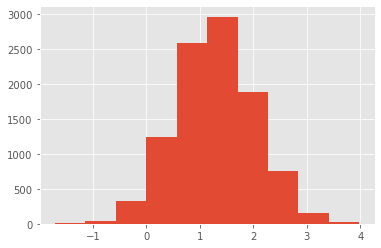

In [6]:
# plot sampling distribution
plt.hist(diffs);

In [7]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, np.std(diffs), 10000)

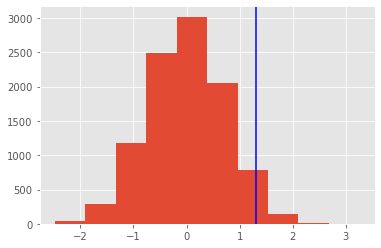

In [8]:
# plot null distribution
plt.hist(null_vals)

# plot line for observed statistic
plt.axvline(x = obs_diff, color = "b");

In [9]:
# calculate P-value
(null_vals > obs_diff).mean()

0.0384

In [10]:
0.0384 > 0.05

False

**alpha = 0.05 or 5%**  
The results show that the statistic did not come from the null distribution.  
We reject the null.

### Do you have evidence, with a type I error rate of 0.05, that users spend more time in the classroom after seeing the experimental description in the course overview page?

Answer:
- Yes.

### Is this difference practically significant?

Answer:
- NO.